In [1]:
import PIL

In [2]:
import pandas as pd

In [3]:
#import cv2
import numpy as np
import glob
import tensorflow as tf
import tensorflow
from tensorflow.keras import datasets, layers, models

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
#from tensorflow.keras.utils import np_utils
from tensorflow.keras import utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD
import tensorflow.keras
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt

In [6]:
vehicle_images = glob.glob('./vehicle_chips2/*/*.png')

In [7]:
vehicle_images

['./vehicle_chips2/set2/vehicle_chip_715.png',
 './vehicle_chips2/set2/vehicle_chip_701.png',
 './vehicle_chips2/set2/vehicle_chip_729.png',
 './vehicle_chips2/set2/vehicle_chip_932.png',
 './vehicle_chips2/set2/vehicle_chip_926.png',
 './vehicle_chips2/set2/vehicle_chip_517.png',
 './vehicle_chips2/set2/vehicle_chip_503.png',
 './vehicle_chips2/set2/vehicle_chip_661.png',
 './vehicle_chips2/set2/vehicle_chip_675.png',
 './vehicle_chips2/set2/vehicle_chip_885.png',
 './vehicle_chips2/set2/vehicle_chip_891.png',
 './vehicle_chips2/set2/vehicle_chip_649.png',
 './vehicle_chips2/set2/vehicle_chip_846.png',
 './vehicle_chips2/set2/vehicle_chip_852.png',
 './vehicle_chips2/set2/vehicle_chip_853.png',
 './vehicle_chips2/set2/vehicle_chip_847.png',
 './vehicle_chips2/set2/vehicle_chip_648.png',
 './vehicle_chips2/set2/vehicle_chip_890.png',
 './vehicle_chips2/set2/vehicle_chip_884.png',
 './vehicle_chips2/set2/vehicle_chip_674.png',
 './vehicle_chips2/set2/vehicle_chip_660.png',
 './vehicle_c

In [8]:
len(vehicle_images)

3271

In [9]:
vehicle_labels = np.ones(shape = (3271))
vehicle_labels = vehicle_labels.astype('uint8')

In [10]:
full_set = list(zip(vehicle_images, vehicle_labels))

In [11]:
df = pd.DataFrame(full_set, columns = ['image_names', 'vehicle_or_not'])
df.head()

,image_names,vehicle_or_not
0,./vehicle_chips2/set2/vehicle_chip_715.png,1
1,./vehicle_chips2/set2/vehicle_chip_701.png,1
2,./vehicle_chips2/set2/vehicle_chip_729.png,1
3,./vehicle_chips2/set2/vehicle_chip_932.png,1
4,./vehicle_chips2/set2/vehicle_chip_926.png,1


In [12]:
tree_images = glob.glob('./tree_chips2/*/*.png')

In [13]:
len(tree_images)

1925

In [14]:
tree_labels = np.zeros(shape = (1925))
tree_labels = tree_labels.astype('uint8')

In [15]:
tree_set = list(zip(tree_images, tree_labels))

In [16]:
df = df.append(pd.DataFrame(tree_set, columns = ['image_names', 'vehicle_or_not'])).reset_index()

In [17]:
df = df[['image_names','vehicle_or_not']]

In [18]:
df

,image_names,vehicle_or_not
0,./vehicle_chips2/set2/vehicle_chip_715.png,1
1,./vehicle_chips2/set2/vehicle_chip_701.png,1
2,./vehicle_chips2/set2/vehicle_chip_729.png,1
3,./vehicle_chips2/set2/vehicle_chip_932.png,1
4,./vehicle_chips2/set2/vehicle_chip_926.png,1
...,...,...
5191,./tree_chips2/set1/tree_chip_378.png,0
5192,./tree_chips2/set1/tree_chip_191.png,0
5193,./tree_chips2/set1/tree_chip_185.png,0
5194,./tree_chips2/set1/tree_chip_152.png,0


In [19]:
# Split data into train-test data sets

X = df.loc[:,'image_names']
y = df.loc[:,'vehicle_or_not']

# Split
train_x, val_x, train_y, val_y = train_test_split(X, y, 
                                                  test_size = 0.1, 
                                                  random_state = 27, 
                                                  stratify=y)

# Train df
df_train = pd.DataFrame(columns=['image_name','category'])
df_train['image_name'] = train_x
df_train['category'] = train_y

# Test df
df_test= pd.DataFrame(columns=['image_name','category'])
df_test['image_name'] = val_x
df_test['category'] = val_y

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [20]:
df_train

,image_name,category
0,./vehicle_chips2/set3/vehicle_chip_1126.png,1
1,./tree_chips2/set2/tree_chip_796.png,0
2,./tree_chips2/set1/tree_chip_1.png,0
3,./vehicle_chips2/set7/vehicle_chip_2879.png,1
4,./vehicle_chips2/set1/vehicle_chip_291.png,1
...,...,...
4671,./tree_chips2/set4/tree_chip_1849.png,0
4672,./tree_chips2/set2/tree_chip_699.png,0
4673,./vehicle_chips2/set6/vehicle_chip_2650.png,1
4674,./vehicle_chips2/set7/vehicle_chip_2822.png,1


In [21]:
df_test

,image_name,category
0,./tree_chips2/set4/tree_chip_1872.png,0
1,./vehicle_chips2/set5/vehicle_chip_2161.png,1
2,./tree_chips2/set3/tree_chip_1308.png,0
3,./tree_chips2/set4/tree_chip_1588.png,0
4,./vehicle_chips2/set7/vehicle_chip_3119.png,1
...,...,...
515,./vehicle_chips2/set6/vehicle_chip_2528.png,1
516,./vehicle_chips2/set3/vehicle_chip_1278.png,1
517,./vehicle_chips2/set7/vehicle_chip_3080.png,1
518,./tree_chips2/set1/tree_chip_476.png,0


In [22]:
# Images
train_images = df_train.loc[:,'image_name']
train_labels = df_train.loc[:,'category']

test_images = df_test.loc[:,'image_name']
test_labels = df_test.loc[:,'category']

# Train images
x_train = []
for i in train_images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x_train.append(img)

# Train labels
y_train=tf.keras.utils.to_categorical(train_labels)

# Test images
x_test = []
for i in test_images:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x_test.append(img)

# Test labels
y_test=tf.keras.utils.to_categorical(test_labels)

# Normalize images
x_train = np.array(x_train, dtype="float") / 255.0
x_test = np.array(x_test, dtype="float") / 255.0

In [23]:
x_train.shape

(4676, 24, 24, 3)

In [24]:
x_train[0]

array([[[0.76862745, 0.78039216, 0.74901961],
        [0.77254902, 0.78431373, 0.74509804],
        [0.71764706, 0.72941176, 0.66666667],
        ...,
        [0.85882353, 0.85098039, 0.83529412],
        [0.80784314, 0.8       , 0.78823529],
        [0.75294118, 0.74509804, 0.7372549 ]],

       [[0.77254902, 0.78039216, 0.75294118],
        [0.78039216, 0.78823529, 0.75686275],
        [0.75294118, 0.76078431, 0.70980392],
        ...,
        [0.9254902 , 0.91764706, 0.90196078],
        [0.87843137, 0.87058824, 0.85882353],
        [0.82745098, 0.81960784, 0.81176471]],

       [[0.78039216, 0.78039216, 0.75686275],
        [0.79607843, 0.79607843, 0.77254902],
        [0.79607843, 0.79607843, 0.75686275],
        ...,
        [0.99607843, 0.98823529, 0.97254902],
        [0.95294118, 0.94509804, 0.93333333],
        [0.90588235, 0.89803922, 0.89019608]],

       ...,

       [[0.63529412, 0.62352941, 0.6       ],
        [0.63529412, 0.61960784, 0.6       ],
        [0.62745098, 0

In [25]:
x_train_show = x_train[100]

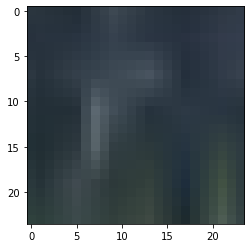

In [26]:
plt.imshow(x_train_show)

In [27]:
x_test.shape

(520, 24, 24, 3)

In [28]:
y_train[0]

array([0., 1.], dtype=float32)

In [29]:
y_train.shape

(4676, 2)

In [30]:
y_test.shape

(520, 2)

In [31]:
# Model architechture
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(24, 24, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.24))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

2022-01-12 20:55:08.003839: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-12 20:55:08.004698: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 4. Tune using inter_op_parallelism_threads for best performance.


In [32]:
# Compile
optim = tf.keras.optimizers.RMSprop(learning_rate=0.00001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

In [33]:
# Augmentation
train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.2,0.8],
                                    )  # brightness

In [34]:
# Epochs
epochs = 25
# Batch size
batch_size = 32

history = model.fit(train_datagen.flow(x_train,y_train,
                                       batch_size=batch_size, 
                                       seed=27,
                                       shuffle=False,
                                      save_to_dir = './created_images',
                                      save_prefix = 'created',
                                      save_format = 'png'),
                    epochs=epochs,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_test,y_test),
                    verbose=1)

Train for 146 steps, validate on 520 samples
Epoch 1/25
146/146 [==============================] - 8s 56ms/step - loss: 1.8299 - accuracy: 0.6100 - val_loss: 0.6909 - val_accuracy: 0.6288
Epoch 2/25
146/146 [==============================] - 7s 46ms/step - loss: 0.7667 - accuracy: 0.7554 - val_loss: 0.6924 - val_accuracy: 0.5096
Epoch 3/25
146/146 [==============================] - 7s 45ms/step - loss: 0.4121 - accuracy: 0.8480 - val_loss: 0.6930 - val_accuracy: 0.5096
Epoch 4/25
146/146 [==============================] - 6s 44ms/step - loss: 0.2761 - accuracy: 0.8964 - val_loss: 0.6944 - val_accuracy: 0.5096
Epoch 5/25
146/146 [==============================] - 7s 46ms/step - loss: 0.1899 - accuracy: 0.9326 - val_loss: 0.6948 - val_accuracy: 0.5096
Epoch 6/25
146/146 [==============================] - 6s 43ms/step - loss: 0.1495 - accuracy: 0.9460 - val_loss: 0.6955 - val_accuracy: 0.5096
Epoch 7/25
146/146 [==============================] - 7s 46ms/step - loss: 0.1111 - accuracy: 0.9

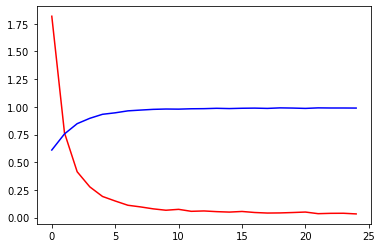

In [35]:
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['accuracy'], 'b')
plt.show()

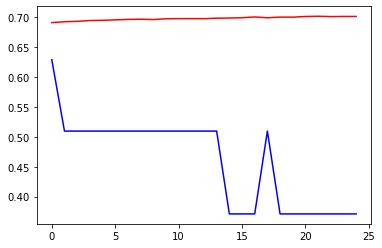

In [36]:
plt.plot(history.history['val_loss'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.show()

In [40]:
im = cv2.imread('./created_images/created_0_3856.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [41]:
'''
cv2.imshow('image', im)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

"\ncv2.imshow('image', im)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

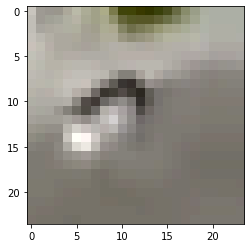

In [42]:
plt.imshow(im)